<a href="https://colab.research.google.com/github/cibelerusso/Aprendizado_de_Maquina/blob/main/Codigos%20em%20Python/PIPGES/Redes_neurais_classifica%C3%A7%C3%A3o_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aprendizado de Máquina Estatístico

### por Cibele Russo

### ICMC/USP - São Carlos SP

## Redes neurais artificiais para classificação em k classes

### Redes neurais artificiais para classificação em k classes

$\text{softmax}(z)_j = \frac{e^{z_j}}{\sum_{k=1}^{K} e^{z_k}}$


In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Carregando o conjunto de dados MNIST
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Pré-processamento dos dados
x_train, x_test = x_train / 255.0, x_test / 255.0


In [23]:
x_train, y_train

(array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],


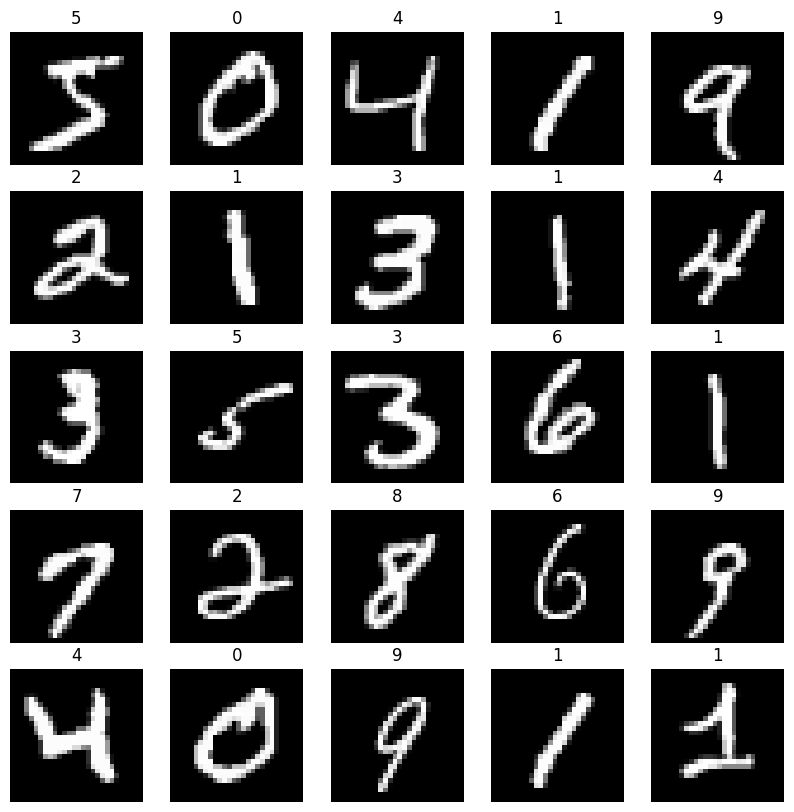

In [24]:
# Visualizando uma amostra dos dados de treinamento
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(str(y_train[i]))
    plt.axis('off')
plt.show()

In [25]:
# Visualizando uma amostra dos dados de teste

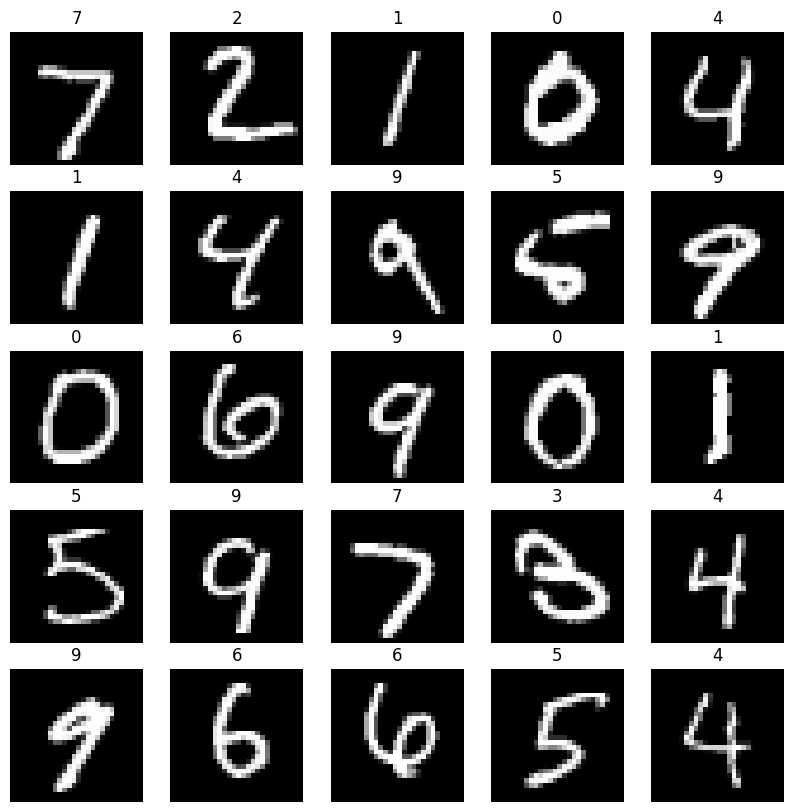

In [26]:
# Visualizando uma amostra dos dados de teste
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(str(y_test[i]))
    plt.axis('off')
plt.show()

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2978 - accuracy: 0.9136 - val_loss: 0.1477 - val_accuracy: 0.9552
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1457 - accuracy: 0.9570 - val_loss: 0.1015 - val_accuracy: 0.9689
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1092 - accuracy: 0.9671 - val_loss: 0.0825 - val_accuracy: 0.9746
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0873 - accuracy: 0.9732 - val_loss: 0.0763 - val_accuracy: 0.9753
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0776 - accuracy: 0.9763 - val_loss: 0.0778 - val_accuracy: 0.9773
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0654 - accuracy: 0.9795 - val_loss: 0.0723 - val_accuracy: 0.9761
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0596 - accuracy: 0.9806 - val_loss: 0.0758 - val_accuracy:

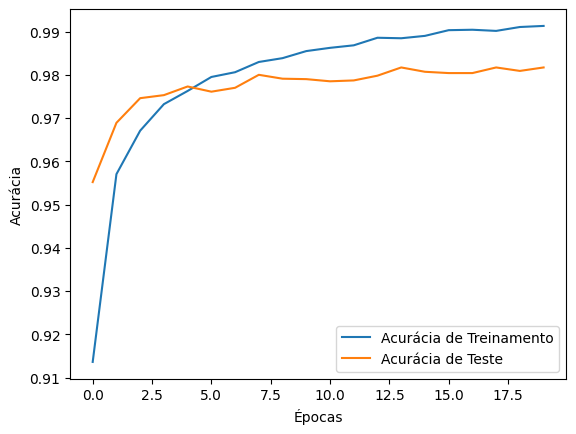

In [27]:

# Criando o modelo da rede neural
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compilando o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinando o modelo e registrando a acurácia
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# Avaliando a precisão do modelo nos dados de teste
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'A precisão no conjunto de teste é: {test_acc}')

# Exibindo a acurácia durante o treinamento
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Teste')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()
